<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Tensorflow/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural networks in TensorFlow

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Create Data view and fit

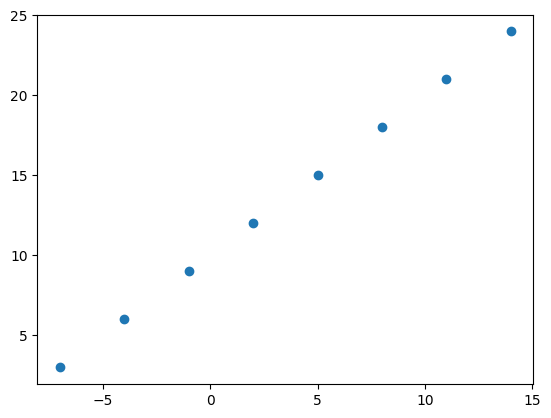

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create Feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input Output Shapes

In [4]:
#create demo tensor for house prediction
house_info = tf.constant(["bedroom", "bathroom", 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Create a model
2. Compile a model
3. Fitting a model

In [7]:
 tf.random.set_seed(42)

 # Create a model
 model = tf.keras.Sequential()

 model.add(tf.keras.layers.Dense(1))

 # Compile the model
 model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=['mae'])

 # Fit the model
 model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 597ms/step - loss: 8.7275 - mae: 8.7275
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 8.5949 - mae: 8.5949
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 8.4625 - mae: 8.4625
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.3300 - mae: 8.3300
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 8.1975 - mae: 8.1975


In [8]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 178ms/step


array([[26.205952]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model

**Creating a model** : here we might add more layers, increase # hidden units (neurons) within each of the hidden layers, change the activation function of each layer.

**Compiling a model** : here we might change the optimization function or perhaps the **learning rate** of the optimization function.

**Fitting a model** : here we might fit a model for more **epochs** or on more data.

In [10]:
# Let's rebuild the model for improvement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model.compile(loss = "mae",
              optimizer = "sgd",
              metrics = ["mae"])

# Fit the model (modified)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 523ms/step - loss: 17.5839 - mae: 17.5839
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 17.3027 - mae: 17.3027
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 17.0214 - mae: 17.0214
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 16.7402 - mae: 16.7402
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 16.4589 - mae: 16.4589
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 16.1777 - mae: 16.1777
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8964 - mae: 15.8964
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 15.6152 - mae: 15.6152
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 15.3339 - mae: 15.3339
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 15.0527 - mae: 15.0527
Epoch 11/100
1/1 [==============================]

In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 166ms/step


array([[29.274754]], dtype=float32)

In [13]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= 'mae',
               optimizer = 'sgd',
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 954ms/step - loss: 13.4361 - mae: 13.4361
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1710 - mae: 13.1710
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9120 - mae: 12.9120
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6654 - mae: 12.6654
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3986 - mae: 12.3986
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1087 - mae: 12.1087
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7830 - mae: 11.7830
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4073 - mae: 11.4073
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9595 - mae: 10.9595
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4258 - mae: 10.4258
Epoch 11/100
1/1 [==============================

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 96ms/step


array([[30.825077]], dtype=float32)

In [60]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 51.6373 - mae: 51.6373
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 51.1718 - mae: 51.1718
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 50.7702 - mae: 50.7702
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 50.3514 - mae: 50.3514
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 49.9207 - mae: 49.9207
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 49.4992 - mae: 49.4992
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 49.0557 - mae: 49.0557
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 48.6237 - mae: 48.6237
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 48.2118 - mae: 48.2118
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 47.7453 - mae: 47.7453
Epoch 11/100
2/2 [==============================] - 0s 8

In [61]:
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[16.2626]], dtype=float32)

In [62]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 46.5833 - mae: 46.5833
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 29.8130 - mae: 29.8130
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9187 - mae: 15.9187
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6167 - mae: 10.6167
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.7510 - mae: 14.7510
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 15.9212 - mae: 15.9212
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2056 - mae: 12.2056
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4554 - mae: 9.4554
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7349 - mae: 8.7349
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5165 - mae: 9.5165
Epoch 11/100
2/2 [==============================] - 0s 9ms/step

In [63]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[26.422806]], dtype=float32)

## Evaluating a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.......
```



When it comes to evaluation. we have to do

> Visualization

It's a good idea to visualize:

* The data - what data are we working with ? what does it looks like?
* The model itself - what does our model looks like?
* The training of model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth.

In [19]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

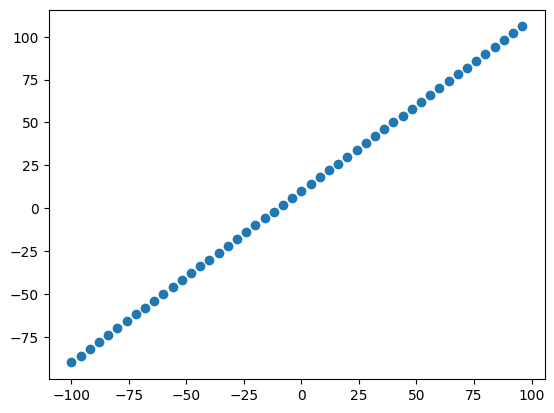

In [21]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### 3 sets

* Training set - the model learns from this data, which is around 79-80% of total data
* Valdation set - the model gets tuned on this data, which is around 10-15% of total data
* Test set - the model gets evaluated on this data, which is typically 10- 15% of total data


In [22]:
X_train = X[:40]
X_test = X[40:]

In [23]:
y_train = y[:40]
y_test = y[40:]

In [24]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data

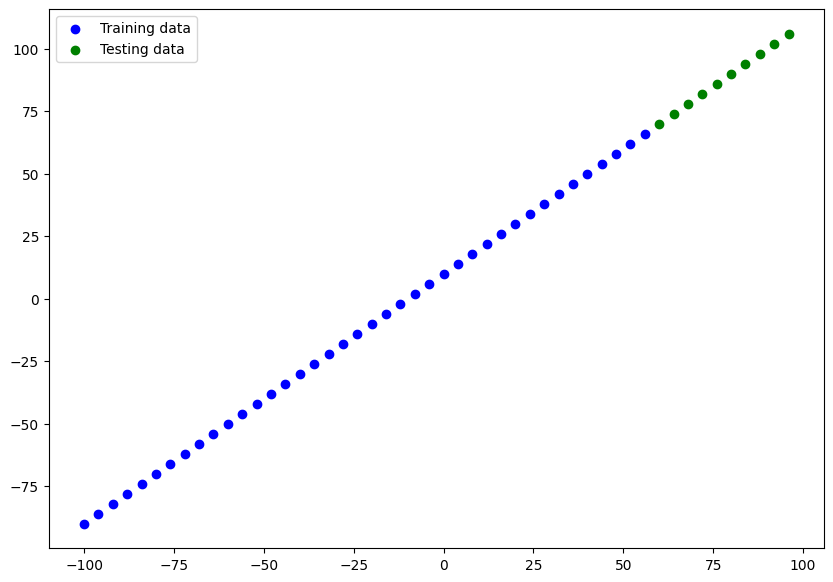

In [25]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')

plt.legend()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(X_train, y_train, epochs = 100)

In [27]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [28]:
 tf.random.set_seed(42)

 model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape = [1],name='input_layer'),
     tf.keras.layers.Dense(1, name = 'output_layer')
 ], name = "Model_1")

 model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

In [29]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [31]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


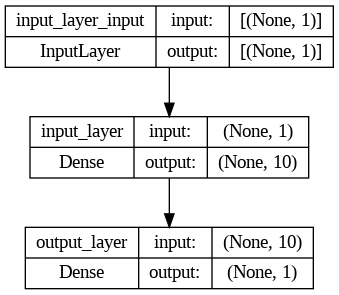

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Visualize our Model's prediction

In [64]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 68.141975],
       [ 72.02283 ],
       [ 75.90366 ],
       [ 79.78452 ],
       [ 83.66538 ],
       [ 87.546234],
       [ 91.42708 ],
       [ 95.30794 ],
       [ 99.18879 ],
       [103.06963 ]], dtype=float32)

In [65]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [66]:
model.predict([17.0])

1/1 [==============================] - 0s 44ms/step


array([[26.422806]], dtype=float32)

In [67]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c= "b", label = "training Data")

  plt.scatter(test_data, test_labels, c = 'g', label = "testing Data")

  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")

  plt.legend

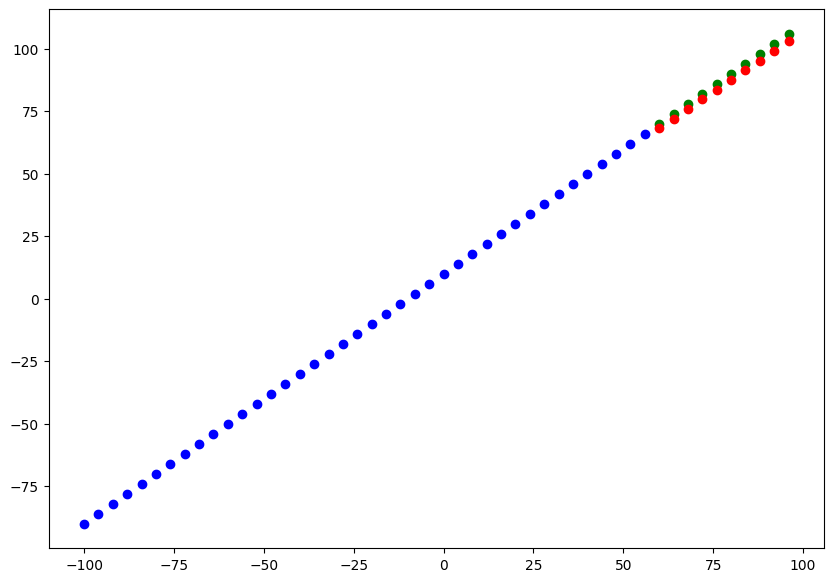

In [68]:
plot_predictions()

### Evaluating using regression evaluation metrics

In [38]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 149ms/step - loss: 10.2630 - mae: 10.2630


[10.26298713684082, 10.26298713684082]

In [39]:
# Ca;culate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.604431, 11.223368, 10.021889, 10.167905, 11.515399, 14.042488,
       17.749157, 22.635422, 27.584387, 32.53337 ], dtype=float32)>

In [40]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.992615],
       [ 80.94158 ],
       [ 85.89056 ],
       [ 90.83952 ],
       [ 95.7885  ],
       [100.73748 ],
       [105.68645 ],
       [110.63542 ],
       [115.58439 ],
       [120.53337 ]], dtype=float32)>

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.992615,  80.94158 ,  85.89056 ,  90.83952 ,  95.7885  ,
       100.73748 , 105.68645 , 110.63542 , 115.58439 , 120.53337 ],
      dtype=float32)>

In [43]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.262988>

In [44]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=112.75846>

In [49]:
def MAE(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def MSE(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Model Improvement

1. Get more Data
2. Make model Larger.
3. Train for Longer

In [46]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

3 modelling Experiments

1. `model_1` = same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` = 2 layers, trained for 100 epochs.
3. `model_3` = 2 layers, trained for 500 epochs

In [51]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 54.3983 - mae: 54.3983
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 20.4146 - mae: 20.4146
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9981 - mae: 7.9981
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9956 - mae: 7.9956
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1942 - mae: 10.1942
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 9.4554 - mae: 9.4554
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.5929 - mae: 8.5929
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0571 - mae: 9.0571
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.7866 - mae: 18.7866
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1419 - mae: 10.1419
Epoch 11/100
2/2 [==============================] - 0s 9ms/step 

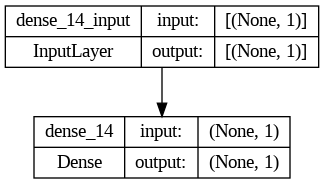

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

In [56]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 53ms/step


array([[44.460377],
       [47.338486],
       [50.216595],
       [53.094704],
       [55.972813],
       [58.85092 ],
       [61.729027],
       [64.60713 ],
       [67.485245],
       [70.36335 ]], dtype=float32)

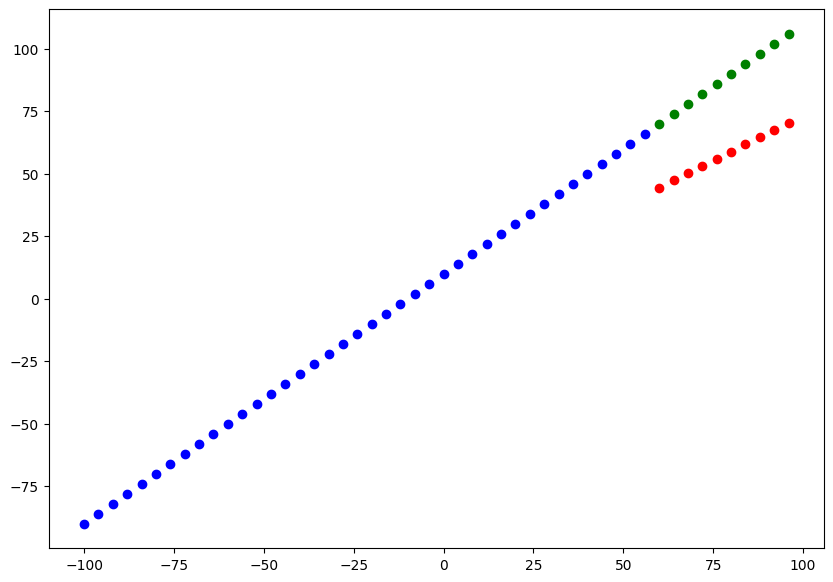

In [57]:
plot_predictions(predictions=y_pred_1)

In [59]:
MAE(y_true=y_test, y_pred=y_pred_1), MSE(y_true = y_test, y_pred=y_pred_1)

(<tf.Tensor: shape=(), dtype=float32, numpy=30.588135>,
 <tf.Tensor: shape=(), dtype=float32, numpy=946.01776>)

### `model_2`

In [73]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 28.2458 - mae: 28.2458
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.8165 - mae: 25.8165
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.6964 - mae: 29.6964
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 16.5382 - mae: 16.5382
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 18.9823 - mae: 18.9823
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2770 - mae: 14.2770
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5435 - mae: 11.5435
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2599 - mae: 11.2599
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 42.2384 - mae: 42.2384
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 29.4046 - mae: 29.4046
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 60ms/step


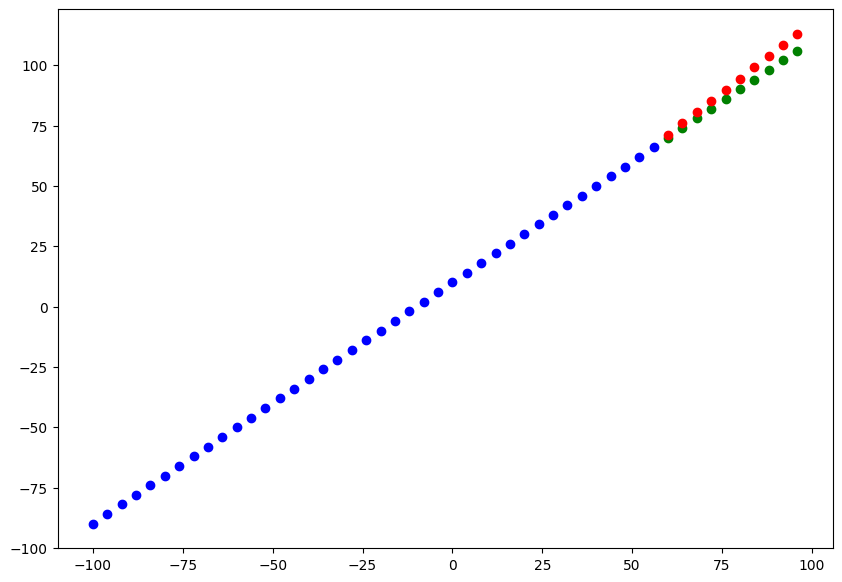

In [74]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [75]:
MAE(y_test, y_pred_2)

<tf.Tensor: shape=(), dtype=float32, numpy=4.130744>

In [76]:
MSE(y_test, y_pred_2)

<tf.Tensor: shape=(), dtype=float32, numpy=20.442411>

### `model_3`

In [83]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 37.8452 - mae: 37.8452
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 23.4083 - mae: 23.4083
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 28.7172 - mae: 28.7172
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.2424 - mae: 27.2424
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.8671 - mae: 14.8671
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8236 - mae: 11.8236
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1455 - mae: 11.1455
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0704 - mae: 11.0704
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.2067 - mae: 40.2067
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.6315 - mae: 27.6315
Epoch 11/500
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 126ms/step


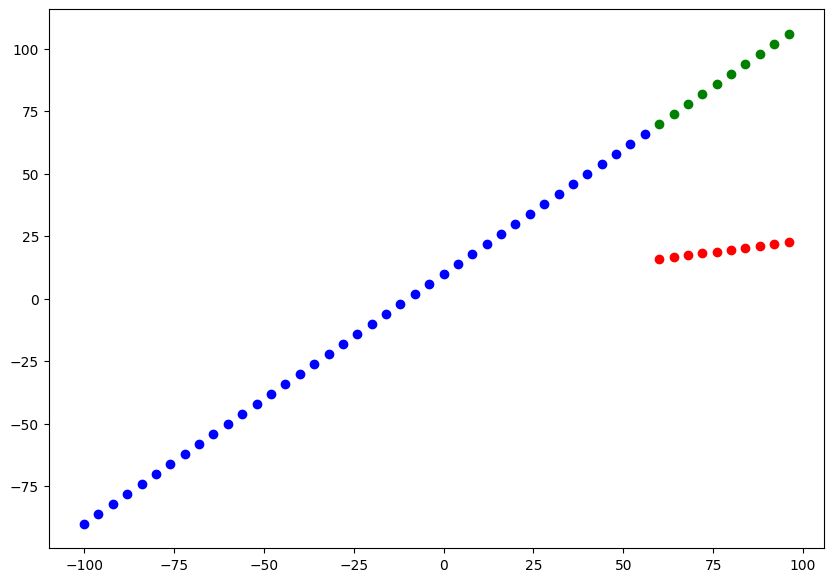

In [84]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [85]:
MAE(y_test, y_pred_3), MSE(y_test, y_pred_3)

(<tf.Tensor: shape=(), dtype=float32, numpy=68.717606>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.724>)